# Predictive Health Assessment: Leveraging DHS Data for Targeted Interventions in Kenya


**Authors**: [Alpha Guya](mailto:alpha.guya@student.moringaschool.com), [Ben Ochoro](mailto:ben.ochoro@student.moringaschool.com), [Caleb Ochieng](mailto:caleb.ochieng@student.moringaschool.com), [Christine Mukiri](mailto:christine.mukiri@student.moringaschool.com), [Dominic Muli](mailto:dominic.muli@student.moringaschool.com), [Frank Mandele](mailto:frank.mandele@student.moringaschool.com), [Jacquiline Tulinye](mailto:jacquiline.tulinye@student.moringaschool.com) and [Lesley Wanjiku](mailto:lesley.wanjiku@student.moringaschool.com)

## 1.0) Project Overview

Our project focuses on using machine learning techniques and data sourced from the Demographic and Health Surveys (DHS) program to generate predictive models aimed at evaluating individual and household health risks in Kenya. By analyzing various set of demographic, socio-economic, and health-related indicators, we target to develop reliable predictive models capable of estimating the likelihood of malnutrition, disease prevalence, and various health risks within certain communities. The goal is to provide users such as public health officials with targeted insights. This will enable more effective allotment of resources and interventions. This proactive approach is geared to optimize the impact of health initiatives, allowing for the prioritization and customization of interventions to at risk populations, ultimately contributing to the improvement of health outcomes in Kenya.

## 1.1) Business Problem

Despite existing health interventions, Kenya encounters difficulties in effectively targeting resources and interventions. This will help to address individual and household health risks, including malnutrition, diseases, and other health concerns. This fault highlights the need for a predictive and targeted approach to allocate resources and interventions more effectively. Leveraging machine learning models built upon Demographic and Health Surveys (DHS) data, the project aims to develop predictive models capable of assessing the likelihood of malnutrition, disease prevalence, and health risks based on individual and household characteristics. By accurately identifying at-risk populations, this solution seeks to empower decision-makers and public health officials to allocate resources on need basis, ultimately increasing the impact of health interventions and improving overall health outcomes in Kenya.

## 1.2) Objectives


Based on the data provided by DHS(Demographic and Health Surveys) , some of the objectives include:

* To analyze trends in health indicators over time.

* To predict Health Risks based on individual and household characteristics. 

* To find the relationship between the most common diseases and the demographic.

*  To Build predictive models to estimate health outcomes based on various demographic and socio-economic factors.

*  To identify regional variations in health indicators.

* To Identify factors contributing to changes in health outcomes.

* To Conduct comprehensive feature engineering to extract relevant features from DHS data, considering demographic, socio-economic, and health-related variables.


### API Deployment and Usability

Deploy an accessible API interface for stakeholders to input data and receive health risk predictions based on the developed models.

### Recommendations and Conclusion
* Targeted Intervention Recommendations:

Utilize model predictions to generate targeted recommendations for health interventions and resource allocation in specific Kenyan communities.

* Impact Assessment and Validation:

Assess the real-world impact of model-guided interventions by monitoring and evaluating changes in health outcomes in targeted Kenyan populations.

## 1.3) Metric of Success

* Achieve a predictive accuracy of at least 90% on unseen validation data.
* Identify and utilize the top 10 most influential features contributing to the models' predictive power.
* Generate clear and interpretable explanations for at least 70% of model predictions.
* Create a prioritized list of actionable recommendations based on identified health risks for at least 100 of communities.
* Ensure an API uptime of at least 90% and gather feedback on usability for further improvements.
* Measure the effectiveness of interventions by observing changes in health indicators, aiming for improvements in at least 80% of targeted communities.

## 1.4) Data Relevance and Validation

The data available is relevant for the intended analysis and predictions

## 2.0) Understanding the Data

The data for this project is obtained from the [DHS Program website](https://dhsprogram.com/data/dataset/Kenya_Standard-DHS_2022.cfm?flag=0).
The encoding for this dataset is explained [here](./Recode7_DHS_10Sep2018_DHSG4.pdf).

## 2.1) Reading the Data

### 2.1.1) Installations

In [1]:
# installations
# %pip install requests
# %pip install pyreadstat
# %pip install --upgrade openpyxl
# %pip install seaborn --upgrade


### 2.1.2) Importing Relevant Libraries

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix, roc_curve,roc_auc_score,classification_report,confusion_matrix, ConfusionMatrixDisplay, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import subprocess
import requests

### 2.1.3) Reading the Data

In [3]:
# Reading downloaded relevant data
df_2, meta_2 = pyreadstat.read_sav("./data/KEHR81FL.SAV")

In [4]:
df_2.head()

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,SML16A$15,SML16A$16,SML16A$17,SML16A$18,SML16A$19,SML16A$20,SML16A$21,SML16A$22,SML16A$23,SML16A$24
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_2.shape

(7952, 1955)

In [6]:
# Converting column names for df_2 to labels dictionary to a DataFrame
labels_df_2 = pd.DataFrame(list(meta_2.column_names_to_labels.items()), columns=['Column Name', 'Label'])

# Saving the DataFrame to an Excel file
excel_file_path = './Output/column_names_to_labels_2.xlsx'
labels_df_2.to_excel(excel_file_path, index=False)

In [7]:
# List of categorical and numerical columns
categorical_variables = list(meta_2.variable_to_label.keys())
numerical_variables = [var_name for var_name in meta_2.column_names if var_name not in categorical_variables]

print("Categorical Variables:", categorical_variables)
print("Numerical Variables:", numerical_variables)

Categorical Variables: ['HV003', 'HV015', 'HV020', 'HV022', 'HV023', 'HV024', 'HV025', 'HV026', 'HV027', 'HV042', 'HV045A', 'HV045B', 'HV045C', 'HV046', 'HV803', 'HV201', 'HV202', 'HV201A', 'HV204', 'HV205', 'HV206', 'HV207', 'HV208', 'HV209', 'HV210', 'HV211', 'HV212', 'HV213', 'HV214', 'HV215', 'HV217', 'HV219', 'HV220', 'HV221', 'HV225', 'HV226', 'HV227', 'HV228', 'HV235', 'HV238', 'HV238A', 'HV239', 'HV240', 'HV241', 'HV242', 'HV243A', 'HV243B', 'HV243C', 'HV243D', 'HV243E', 'HV244', 'HV245', 'HV246', 'HV246A', 'HV246B', 'HV246C', 'HV246D', 'HV246E', 'HV246F', 'HV246G', 'HV246H', 'HV246I', 'HV246J', 'HV246K', 'HV247', 'HV270', 'HV270A', 'HML1', 'SHCOUNTY', 'SHZONE', 'SH109', 'SH110', 'SH116G', 'SH116H', 'SH116I', 'SH116J', 'SH116K', 'SH116L', 'SH116M', 'SH116N', 'SH116O', 'SH116P', 'SH119', 'SH119A', 'HV101$01', 'HV101$02', 'HV101$03', 'HV101$04', 'HV101$05', 'HV101$06', 'HV101$07', 'HV101$08', 'HV101$09', 'HV101$10', 'HV101$11', 'HV101$12', 'HV101$13', 'HV101$14', 'HV101$15', 'HV1

In [8]:
# Extracting unique prefixes before $ for repeated variables
unique_prefixes = list(set(col.split('$')[0] for col in df_2.columns))
print("Unique Prefixes:", unique_prefixes)

Unique Prefixes: ['HV042', 'HML1', 'SHZONE', 'HML9', 'SH116N', 'HV045C', 'HV802', 'HV040', 'HV228', 'HML17', 'HV117', 'HC18', 'HC32A', 'HC19', 'HML14', 'HV221', 'HV271', 'SB122', 'HV020', 'HV804', 'HV201A', 'SB123', 'HV271A', 'HC53', 'HV001', 'HML32G', 'HV210', 'HV246I', 'SH116I', 'HV103', 'HV105', 'HC1', 'HV026', 'SH110', 'HC32', 'HMLIDX', 'HMLE', 'HV207', 'HV243E', 'SB128D', 'HV807C', 'HML21', 'SH116M', 'HV246H', 'HC0', 'HV013', 'HV030', 'HML3', 'HV032', 'HV009', 'HV243B', 'HV801', 'HV246', 'HV241', 'SB115H', 'HV023', 'HC58', 'HC64', 'HV025', 'HV015', 'SH109', 'HML34', 'HML7', 'HV021', 'HV208', 'HC61', 'HC16', 'HV246B', 'SHCOUNTY', 'HV246G', 'SHC1A', 'HC51', 'HML16A', 'HV217', 'HV243A', 'HML4', 'HV227', 'HC52', 'HV216', 'HML1A', 'HV201', 'HV028', 'HC62', 'SH116H', 'HC17', 'HV024', 'HV807D', 'HC57', 'HV202', 'HV007', 'HV008A', 'HV120', 'SHC1', 'HV214', 'HV004', 'HV245', 'SB119', 'SH130', 'HML20', 'HV204', 'HV220', 'HMLB', 'SB115F', 'HML16', 'HV104', 'HV003', 'HV011', 'HV213', 'SB128Y'

In [9]:

def collapse_columns(df, prefix, suffixes, combined_column):
    # Extracting columns with the specified prefix and suffixes
    relevant_columns = [col for col in df.columns if col.startswith(prefix) and any(col.endswith(suffix) for suffix in suffixes)]

    # Creating a new column 'combined_column' with the highest value for each row
    df[combined_column] = df[relevant_columns].max(axis=1)

    # Dropping the original columns
    df.drop(relevant_columns, axis=1, inplace=True)

    return df

def filter_and_exclude_prefix(df, prefix, exclude_first_n=6):
    filtered_columns = [col for col in df.columns if col.startswith(prefix)]
    modified_columns = [col[exclude_first_n:] for col in filtered_columns]
    return modified_columns

In [10]:
# Looping through a list of columns to combine them
columns = list(set([col.split('$')[0] for col in df_2.columns if '$' in col]))

for i in columns:
    df_2_suffixes = filter_and_exclude_prefix(df_2, f'{i}$')
    df_2 = collapse_columns(df_2, f'{i}$', df_2_suffixes, f'{i}_combined')

In [11]:
print(columns)

['HML9', 'HML17', 'HV117', 'HC18', 'HC32A', 'HC19', 'HML14', 'SB122', 'SB123', 'HC53', 'HML32G', 'HMLE', 'HV103', 'HV105', 'HC1', 'HC32', 'HMLIDX', 'SB128D', 'HML21', 'HC0', 'HML3', 'SB115H', 'HC58', 'HC64', 'HML34', 'HML7', 'HC61', 'HC16', 'SHC1A', 'HC51', 'HML16A', 'HML4', 'HC52', 'HC62', 'HC17', 'HC57', 'SHC1', 'HV120', 'SH130', 'SB119', 'HML20', 'HMLB', 'SB115F', 'HML16', 'HV104', 'SB128Y', 'HML32A', 'SB115E', 'HML8', 'HML33', 'HC1A', 'HML5', 'SB128M', 'HV101', 'HML6', 'HML23', 'HML22', 'HC63', 'HML19', 'SB115D', 'HML36', 'HC68', 'HC27', 'HC33', 'HML15', 'HC30', 'HC55', 'HML13', 'HML11', 'HML32F', 'HMLA', 'HML32E', 'HML18', 'HMLC', 'HML32', 'HV102', 'SB115A', 'HML31', 'HML32D', 'HC31', 'HML32C', 'HC60', 'HC56', 'SB115B', 'HML30', 'SML16A', 'HMHIDX', 'HMLD', 'HML10', 'HML32B', 'HC21', 'SB115G', 'HC20', 'HVIDX', 'HML12', 'SB115C', 'HML35']


In [12]:
# Updated list of categorical and numerical columns
updated_categorical_variables = list(set([col.split('$')[0] + '_combined' if '$' in col else col for col in categorical_variables]))
updated_numerical_variables = list(set([col.split('$')[0] + '_combined' if '$' in col else col for col in numerical_variables]))

print("Categorical Variables:", updated_categorical_variables)
print("Numerical Variables:", updated_numerical_variables)

Categorical Variables: ['HV042', 'HML1', 'SHZONE', 'HML5_combined', 'SH116N', 'HC33_combined', 'HV045C', 'HV228', 'HV221', 'HV020', 'HV201A', 'SB115G_combined', 'HV210', 'HV246I', 'SB115H_combined', 'HML32C_combined', 'SH116I', 'HV026', 'SH110', 'HV207', 'HV243E', 'HML21_combined', 'SH116M', 'HV246H', 'HML11_combined', 'HV243B', 'HML8_combined', 'HML23_combined', 'HV246', 'HML16A_combined', 'HV241', 'HV023', 'HML13_combined', 'HC51_combined', 'HML4_combined', 'HV025', 'HC1A_combined', 'HV015', 'SH109', 'HML16_combined', 'SB115E_combined', 'HML32_combined', 'HV208', 'HV246B', 'SHCOUNTY', 'HV246G', 'SB115D_combined', 'HML3_combined', 'HV217', 'HV243A', 'HV227', 'HC62_combined', 'HC1_combined', 'HV201', 'SH116H', 'HV024', 'HC27_combined', 'HML32D_combined', 'HV202', 'SB122_combined', 'HV214', 'HV245', 'HV204', 'HV220', 'HML30_combined', 'HV003', 'HML31_combined', 'HML32A_combined', 'HV117_combined', 'HC53_combined', 'HV213', 'HC56_combined', 'SH116J', 'HC31_combined', 'HV120_combined', 'H

In [13]:
df_2.head()

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,HMLD_combined,HML10_combined,HML32B_combined,HC21_combined,SB115G_combined,HC20_combined,HVIDX_combined,HML12_combined,SB115C_combined,HML35_combined
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,1.0,0.0,305.0,NaN,44166.0,8.0,1.0,NaN,0.0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,0.0,305.0,NaN,44165.0,7.0,0.0,NaN,0.0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,1.0,1.0,0.0,305.0,0.0,44166.0,6.0,1.0,0.0,1.0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,1.0,0.0,305.0,NaN,44166.0,4.0,1.0,NaN,0.0


In [14]:
df_2.shape

(7952, 223)

In [15]:
# Replacing empty(missing values) with NaN
df_2.replace(' ',np.nan, inplace=True)
df_2.replace("",np.nan, inplace=True)

In [16]:
# Checking percentage of missing values
def missing_values_summary(df):
    """
    Generate a summary of missing values for each column in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - DataFrame containing columns with NaN values and their percentages
    """

    # Checking percentage of missing values
    nan_info = df.isna().sum()
    nan_percentage = (nan_info / len(df)) * 100

    # Creating a DataFrame with columns and their NaN percentages
    nan_df = pd.DataFrame({'Column': nan_info.index, 'NaN Count': nan_info.values, 'NaN Percentage': nan_percentage.values})

    # Filtering columns with NaN values
    columns_with_nan = nan_df[nan_df['NaN Count'] > 0]

    # Sorting the DataFrame by "NaN Percentage" in descending order
    columns_with_nan = columns_with_nan.sort_values(by='NaN Percentage', ascending=False)

    return columns_with_nan

# Example: Calling the function on df_cleaned
result = missing_values_summary(df_2)
result


,Column,NaN Count,NaN Percentage
13,HV011,7952,100.000000
197,HML32E_combined,7952,100.000000
148,HC58_combined,7952,100.000000
174,HML8_combined,7952,100.000000
177,HML5_combined,7952,100.000000
...,...,...,...
198,HML18_combined,2706,34.029175
76,HV235,2225,27.980382
113,SH110,1917,24.107143
72,HV225,600,7.545272


In [17]:
# Dropping 100% missing values
df_2_cleaned = df_2.dropna(axis=1, how='all')

In [18]:
# Checking percentage of missing values on df_2_cleaned
result_2 = missing_values_summary(df_2_cleaned)
result_2

,Column,NaN Count,NaN Percentage
171,HML15_combined,7949,99.962274
119,HML14_combined,7832,98.490946
47,HV202,7803,98.126258
192,HMLD_combined,7721,97.095070
121,SB123_combined,7305,91.863682
...,...,...,...
177,HML18_combined,2706,34.029175
70,HV235,2225,27.980382
101,SH110,1917,24.107143
72,HV238A,600,7.545272


In [19]:
df_2_cleaned['HML32_combined'].value_counts()

HML32_combined
0.0    4160
1.0     595
Name: count, dtype: int64

In [20]:
df_2_cleaned.head()

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,HMLD_combined,HML10_combined,HML32B_combined,HC21_combined,SB115G_combined,HC20_combined,HVIDX_combined,HML12_combined,SB115C_combined,HML35_combined
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,1.0,0.0,305.0,NaN,44166.0,8.0,1.0,NaN,0.0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,0.0,305.0,NaN,44165.0,7.0,0.0,NaN,0.0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,1.0,1.0,0.0,305.0,0.0,44166.0,6.0,1.0,0.0,1.0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,1.0,0.0,305.0,NaN,44166.0,4.0,1.0,NaN,0.0


In [21]:
df_2_cleaned.shape

(7952, 202)

In [22]:
# # Calculating the threshold for 60% empty columns
threshold_2 = 0.58 * len(df_2)
# Dropping columns with 60% or more empty values
df_2_cleaned = df_2.dropna(axis=1, thresh=threshold_2)
# Displaying the cleaned DataFrame
df_2_cleaned

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,HML30_combined,SML16A_combined,HMHIDX_combined,HML10_combined,HML32B_combined,HC21_combined,HC20_combined,HVIDX_combined,HML12_combined,HML35_combined
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,8.0,138.0,8.0,1.0,0.0,305.0,44166.0,8.0,1.0,0.0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,2.0,121.0,7.0,NaN,0.0,305.0,44165.0,7.0,0.0,0.0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,1.0,90.0,6.0,1.0,0.0,305.0,44166.0,6.0,1.0,1.0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,1.0,20.0,4.0,1.0,0.0,305.0,44166.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,9186 155,KE7,9186.0,155.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,1.0,159.0,5.0,1.0,0.0,1705.0,44148.0,5.0,1.0,1.0
7948,9186 161,KE7,9186.0,161.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,1.0,141.0,5.0,1.0,0.0,1705.0,44148.0,5.0,1.0,0.0
7949,9186 166,KE7,9186.0,166.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,1.0,175.0,4.0,1.0,0.0,1705.0,44149.0,4.0,1.0,0.0
7950,9186 170,KE7,9186.0,170.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,1.0,106.0,6.0,1.0,0.0,1705.0,44149.0,6.0,1.0,1.0


In [23]:
# Checking percentage of missing values on df_2_cleaned
result_2 = missing_values_summary(df_2_cleaned)
result_2

,Column,NaN Count,NaN Percentage
157,HML32_combined,3197,40.203722
155,HMLA_combined,3192,40.140845
134,HC57_combined,3191,40.128270
164,HC56_combined,3191,40.128270
174,HML35_combined,3191,40.128270
170,HC21_combined,3069,38.594064
148,HML36_combined,3069,38.594064
142,HML33_combined,2957,37.185614
140,SB128Y_combined,2952,37.122736
165,HML30_combined,2952,37.122736


In [24]:
# Converting Coded column names into readable column names for df_2

# Loading the Excel file with the column names into a Pandas DataFrame
excel_file_path = 'column_names_dictionary_2.xlsx'
df_excel_2 = pd.read_excel(excel_file_path, sheet_name='Sheet1')

# Displaying the original DataFrame with the column headers
print("Original Excel DataFrame:")
print(df_excel_2)

# Creating a dictionary mapping old column names to new column labels
column_mapping = dict(zip(df_excel_2['Column Names'], df_excel_2['Label Names']))

# Renaming the column headers
df_2_cleaned.rename(columns=column_mapping, inplace=True)

# Displaying the DataFrame with the updated column headers
df_2_cleaned

Original Excel DataFrame:
         Column Names                                   Label Names  \
0                HHID                                  household_id   
1               HV000                                  country_code   
2               HV001                               cluster_number    
3               HV002                              household_number   
4               HV003                    respondent's_ line_number    
...               ...                                           ...   
2047  HML16A_combined                           child_age_in_months   
2048   HML30_combined                         caretaker_line_number   
2049   HML31_combined         na_read_consent_statement_for_malaria   
2050   HML36_combined             fieldworker_malaria_measurer_code   
2051  SML16A_combined  childs_age_in_months_country_specific_hml16a   

                                            Description  
0                                   Case Identification  
1    

<ipython-input-24-75ae64285bc8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_cleaned.rename(columns=column_mapping, inplace=True)


,household_id,country_code,cluster_number,household_number,respondent's_ line_number,area_unit,sample_weight,month_of_the_household_interview,year_of_the_household_interview,month_date_of_household_interview,...,caretaker_line_number,childs_age_in_months_country_specific_hml16a,index_to_household_schedule_hmhidx,insecticide_treated_net,malariae_present,fieldworker_measurer_code,century_day_code_of_measurement,line_number,bed_net_type,rapid_test_result
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,8.0,138.0,8.0,1.0,0.0,305.0,44166.0,8.0,1.0,0.0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,2.0,121.0,7.0,NaN,0.0,305.0,44165.0,7.0,0.0,0.0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,1.0,90.0,6.0,1.0,0.0,305.0,44166.0,6.0,1.0,1.0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,1.0,20.0,4.0,1.0,0.0,305.0,44166.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,9186 155,KE7,9186.0,155.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,1.0,159.0,5.0,1.0,0.0,1705.0,44148.0,5.0,1.0,1.0
7948,9186 161,KE7,9186.0,161.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,1.0,141.0,5.0,1.0,0.0,1705.0,44148.0,5.0,1.0,0.0
7949,9186 166,KE7,9186.0,166.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,1.0,175.0,4.0,1.0,0.0,1705.0,44149.0,4.0,1.0,0.0
7950,9186 170,KE7,9186.0,170.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,1.0,106.0,6.0,1.0,0.0,1705.0,44149.0,6.0,1.0,1.0


In [25]:
# column names df_2_cleaned
for col in df_2_cleaned.columns:
    print(col)

household_id
country_code
cluster_number 
household_number
respondent's_ line_number 
area_unit
sample_weight
month_of_the_household_interview
year_of_the_household_interview
month_date_of_household_interview
day_date_of_household_interview
number_of_household_members
number_of_eligible_women
number_of_de_jure_household_members
number_of_de_facto_household_members
number_of_children_resident
result_of_household_interview
day_of_the_household_interview
number_of_visits
interviewer_id
ever_married
primary_sampling_unit
strata_for_sampling_errors
sample_design
region_of_residence 
type_of_place
male_survey
sample_weight_male
field_supervisor
children_under_five
cluster_altitude
women_height_weight_measured
household_hemoglobin_measurements
questionnaire_language
interview_language
respodent_native_language
translator_used
interview_start_time
interview_end_time
interview_length
number_of_visits_for_biomarker
day_of_biomarker_visit
month_of_biomarker_visit
year_of_biomarker_visit
date_of_b

In [26]:
df_2_cleaned['final_blood_smear_test'].value_counts()

final_blood_smear_test
0.0    4160
1.0     595
Name: count, dtype: int64

In [27]:
# Variable label dictionary
variable_label_2 = meta_2.variable_value_labels

In [28]:
# Getting variable labels
def get_variable_label(column_label, df_excel, variable_labels):
    '''Function to get variable label'''
     
    # Looking up the column label
    matching_row = df_excel[df_excel['Label Names'] == column_label]

    # Getting the corresponding column name
    corresponding_column_name = matching_row['Column Names'].iloc[0] if not matching_row.empty else None

    # Replacing "_combined" with "$01" in column name
    if corresponding_column_name is not None:
        corresponding_column_name = corresponding_column_name.replace('_combined', '$01')

    # Getting variable label names
    variable_label = variable_labels.get(corresponding_column_name, None)

    return variable_label

In [29]:
# Calling the function to get variable labels
variable_label_type_of_place = get_variable_label('type_of_place',df_excel_2, variable_label_2)
variable_label_type_of_place

{1.0: 'Urban', 2.0: 'Rural'}

In [30]:
# Changing numerical and categorical column names to list of column label names
columns_filled_with_mean_all = [df_excel_2[df_excel_2['Column Names'] == col]['Label Names'].values[0] for col in updated_numerical_variables]
columns_filled_with_mode_all = [df_excel_2[df_excel_2['Column Names'] == col]['Label Names'].values[0] for col in updated_categorical_variables]

# Unique identifiers to exclude from numeric column
columns_to_exclude = ['country_code', 'field_supervisor','household_number','area_unit','na_office_editor','cluster_number ','household_id','line_number_of_head_of_household','interviewer_id',
                      'keyer_identification','na_field_editor','line_number','fieldworker_measurer_code','fieldworker_malaria_measurer_code','index_to_household_schedule_hmhidx',
                      'index_to_household_schedule_hc0','primary_sampling_unit',]

# Truncating the list to only columns in df_2_cleaned
columns_filled_with_mean_2 = [col for col in columns_filled_with_mean_all if col in df_2_cleaned.columns and col not in columns_to_exclude]
columns_filled_with_mode_2 = [col for col in columns_filled_with_mode_all if col in df_2_cleaned.columns]

print("Columns filled with mean:", columns_filled_with_mean_2)
print("Columns filled with mofe:", columns_filled_with_mode_2)

Columns filled with mean: ['year_of_biomarker_visit', 'month_date_of_household_interview', 'number_of_eligible_women', 'number_of_visits', 'interview_end_time', 'cluster_altitude', 'Date_measured_month', 'cmc_date_of_birth', 'childs_age_in_months_country_specific', 'childs_age_in_days_country_specific', 'date_of_biomarker_century_day_code', 'wealth_index_factor', 'century_day_code_of_birth', 'number_of_visits_for_biomarker', 'sample_weight', 'children_under_mosquito_net', 'wealth_index_factor_urban_rural', 'month_of_the_household_interview', 'women_height_weight_measured', 'Date_measured_day', 'no_sleep_rooms', 'number_of_mosquito_nets_specific', 'sample_weight_male', 'childs_age_in_months_country_specific_hml16a', 'day_of_biomarker_visit', 'date_of_biomarker', 'Date_measured_year', 'day_date_of_household_interview', 'year_of_the_household_interview', 'day_of_the_household_interview', 'century_day_code_of_measurement', 'number_of_de_facto_household_members', 'number_of_household_member

In [31]:
# Converting encoded categorical columns to numerical data type
df_2_cleaned[columns_filled_with_mode_2] = df_2_cleaned[columns_filled_with_mode_2].apply(pd.to_numeric, errors='coerce')

<ipython-input-31-9a1fc66e68c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_cleaned[columns_filled_with_mode_2] = df_2_cleaned[columns_filled_with_mode_2].apply(pd.to_numeric, errors='coerce')


In [32]:
# Imputing the df_2_cleaned DataFrame 

# Imputing numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
df_2_cleaned[columns_filled_with_mean_2] = numeric_imputer.fit_transform(df_2_cleaned[columns_filled_with_mean_2])

# Imputing non-numeric columns
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
df_2_cleaned[columns_filled_with_mode_2] = non_numeric_imputer.fit_transform(df_2_cleaned[columns_filled_with_mode_2])


<ipython-input-32-aeb347e9e88e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_cleaned[columns_filled_with_mean_2] = numeric_imputer.fit_transform(df_2_cleaned[columns_filled_with_mean_2])
c:\Users\Dominc\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
c:\Users\Dominc\anaconda3\envs\lea

In [33]:
# Converting unique identifiers to strings
columns_to_exclude = [col for col in columns_to_exclude if col in df_2_cleaned.columns]
df_2_cleaned[columns_to_exclude] = df_2_cleaned[columns_to_exclude].astype(str)

<ipython-input-33-40575faddf3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_cleaned[columns_to_exclude] = df_2_cleaned[columns_to_exclude].astype(str)


In [34]:
# Filling missing values in columns_to_exclude with the word "missing"
df_2_cleaned[columns_to_exclude] = df_2_cleaned[columns_to_exclude].fillna('missing')

<ipython-input-34-2798606aaf86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_cleaned[columns_to_exclude] = df_2_cleaned[columns_to_exclude].fillna('missing')


In [35]:
# Checking percentage of missing values on df_2_cleaned
result_2 = missing_values_summary(df_2_cleaned)
result_2

,Column,NaN Count,NaN Percentage


In [36]:
# Saving column names into an Excel file for df_2_cleaned

# Getting the column names
column_names_2 = df_2_cleaned.columns

# Creating a DataFrame with a single column containing the column names
column_names_df_2 = pd.DataFrame(column_names_2, columns=["Column Names"])

# Specifying the Excel file path
excel_file_path = './Output/cleaned_column_names_2.xlsx'

# Writing the DataFrame to the Excel file
column_names_df_2.to_excel(excel_file_path, index=False)

In [37]:
df_2_cleaned['final_blood_smear_test'].value_counts()

final_blood_smear_test
0.0    7357
1.0     595
Name: count, dtype: int64

## 2.3) EDA

### a) Demographic and household information

#### i) Distribution of house hold members

In [38]:
# Displaying the descriptive statistics for all columns
summary_df = df_2_cleaned.describe()

# Saving to csv
summary_df.to_csv('./Output/describe_output_summary.csv')

summary_df


,respondent's_ line_number,sample_weight,month_of_the_household_interview,year_of_the_household_interview,month_date_of_household_interview,day_date_of_household_interview,number_of_household_members,number_of_eligible_women,number_of_de_jure_household_members,number_of_de_facto_household_members,...,ovale_present,mothers_line_number,hemoglobin_level_adjusted_for_altitude_g_dl,caretaker_line_number,childs_age_in_months_country_specific_hml16a,insecticide_treated_net,malariae_present,century_day_code_of_measurement,bed_net_type,rapid_test_result
count,7952.000000,7.952000e+03,7952.000000,7952.0,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,...,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000
mean,1.469064,1.000000e+06,11.386444,2020.0,1451.386444,44161.558602,3.936368,0.884683,3.885689,3.817907,...,0.001509,889.727616,126.165619,1.398013,118.293200,0.932470,0.022887,44161.848311,0.774019,0.088783
std,0.691540,1.554606e+06,0.486965,0.0,0.486965,11.489709,2.463717,0.815771,2.428427,2.425972,...,0.038820,305.722730,11.556432,0.755584,38.226299,0.250954,0.149554,9.200594,0.837202,0.284448
min,1.000000,1.178700e+04,11.000000,2020.0,1451.000000,44144.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,55.000000,0.000000,6.000000,0.000000,0.000000,44144.000000,0.000000,0.000000
25%,1.000000,2.829410e+05,11.000000,2020.0,1451.000000,44151.000000,2.000000,0.000000,2.000000,2.000000,...,0.000000,995.000000,123.000000,1.000000,116.000000,1.000000,0.000000,44157.000000,0.000000,0.000000
50%,1.000000,5.517490e+05,11.000000,2020.0,1451.000000,44160.000000,4.000000,1.000000,4.000000,3.000000,...,0.000000,995.000000,129.000000,1.000000,118.293200,1.000000,0.000000,44161.848311,1.000000,0.000000
75%,2.000000,9.834160e+05,12.000000,2020.0,1452.000000,44172.000000,5.000000,1.000000,5.000000,5.000000,...,0.000000,995.000000,129.000000,2.000000,146.000000,1.000000,0.000000,44165.250000,1.000000,0.000000
max,10.000000,1.409980e+07,12.000000,2020.0,1452.000000,44185.000000,24.000000,10.000000,22.000000,24.000000,...,1.000000,995.000000,196.000000,14.000000,179.000000,1.000000,1.000000,44187.000000,3.000000,1.000000


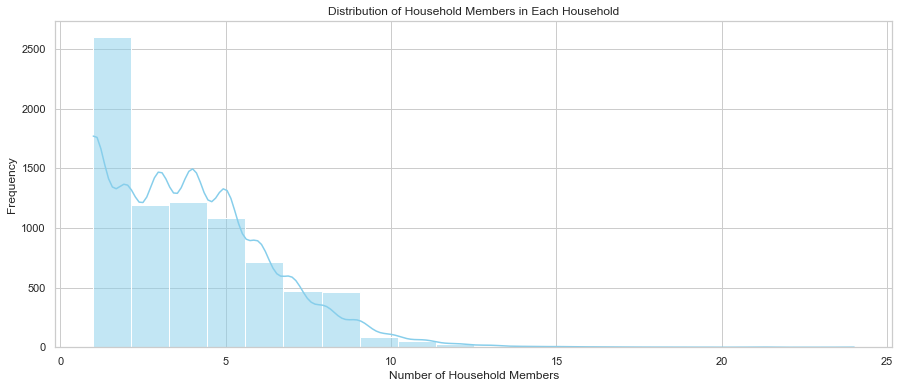

Top 10 Households with Highest Number of Household Members:


,household_id,number_of_household_members
0,2192 37,24.0
1,9111 36,21.0
2,9136 141,21.0
3,1731 21,19.0
4,6022 121,19.0
5,3449 2,18.0
6,1927 83,17.0
7,7037 47,17.0
8,8004 107,16.0
9,8052 70,16.0


In [39]:
# Distribution of household members in household

# Setting the style of seaborn
sns.set(style="whitegrid")


# Converting DataFrame to a NumPy array before indexing
np_array = df_2_cleaned.to_numpy()

# Plotting the distribution
plt.figure(figsize=(15, 6))
sns.histplot(df_2_cleaned['number_of_household_members'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Household Members in Each Household')
plt.xlabel('Number of Household Members')
plt.ylabel('Frequency')
plt.show()

# Identify the top ten households
top_10_households = df_2_cleaned.groupby('household_id')['number_of_household_members'].max().nlargest(10)

# Create a DataFrame from the top_10_households Series
top_10_df = top_10_households.reset_index()

# Print the DataFrame
print("Top 10 Households with Highest Number of Household Members:")
top_10_df

#### ii) Distribution of number of children resident in each household

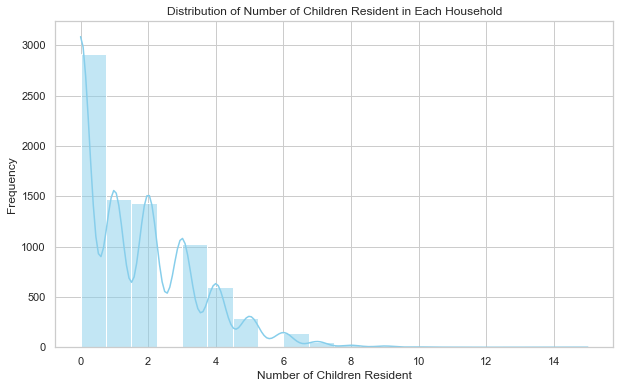

Top 20 Households with Highest Number of Children:


,household_id,number_of_children_resident
0,6022 121,15.0
1,8053 44,11.0
2,2 46,10.0
3,1731 44,10.0
4,4734 78,10.0
5,1927 83,9.0
6,3240 32,9.0
7,4890 10,9.0
8,6028 58,9.0
9,6028 124,9.0


In [40]:
# Identify the top 20 households based on the sum of 'Number_of_children_resident'
top_20_households = df_2_cleaned.groupby('household_id')['number_of_children_resident'].sum().nlargest(10)

# Create a DataFrame from the top_20_households Series
top_20_df = top_20_households.reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_2_cleaned['number_of_children_resident'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Number of Children Resident in Each Household')
plt.xlabel('Number of Children Resident')
plt.ylabel('Frequency')
plt.show()

# Print the DataFrame
print("Top 20 Households with Highest Number of Children:")
top_20_df

In [41]:
# Household has Mosquito net
# Calling the function to get variable labels
variable_label_has_net = get_variable_label('has_mosquito_net',df_excel_2, variable_label_2)
variable_label_has_net

{0.0: 'No', 1.0: 'Yes'}

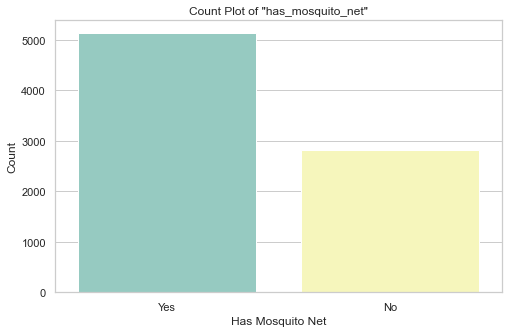

In [42]:
# Household has a mosquito net

# Mapping the variable labels to the column
household_has_mosquito_net = df_2_cleaned['has_mosquito_net'].map(variable_label_has_net).reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='has_mosquito_net', data=household_has_mosquito_net, palette="Set3")
plt.title('Count Plot of "has_mosquito_net"')
plt.xlabel('Has Mosquito Net')
plt.ylabel('Count')
plt.show()

In [43]:
# Type of Place
# Calling the function to get variable labels
variable_label_place = get_variable_label('type_of_place',df_excel_2, variable_label_2)
variable_label_place

{1.0: 'Urban', 2.0: 'Rural'}

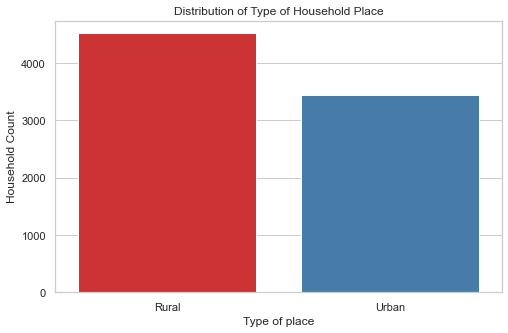

In [44]:
# Mapping the variable labels to the column
household_type_of_place = df_2_cleaned['type_of_place'].map(variable_label_place).reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='type_of_place', data=household_type_of_place, palette="Set1")
plt.title('Distribution of Type of Household Place')
plt.xlabel('Type of place')
plt.ylabel('Household Count')
plt.show()

<ipython-input-45-b8357357647e>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_2_cleaned['has_mosquito_net_label'] = df_2_cleaned['has_mosquito_net'].map(variable_label_has_net)
<ipython-input-45-b8357357647e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_cleaned['has_mosquito_net_label'] = df_2_cleaned['has_mosquito_net'].map(variable_label_has_net)
<ipython-input-45-b8357357647e>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whic

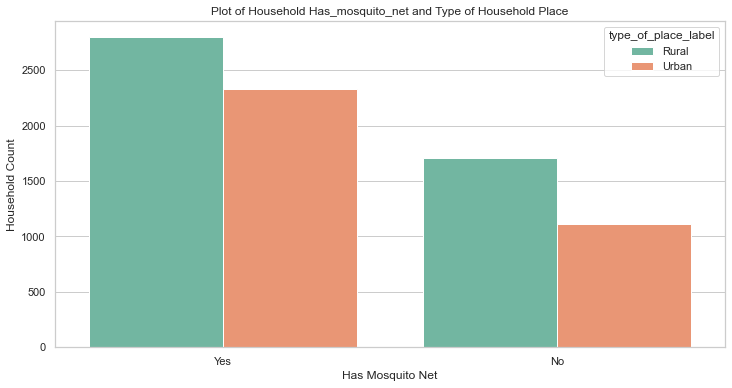

In [45]:
# Comparison plot for the type of place and availability of mosquito nets for the Household

df_2_cleaned['has_mosquito_net_label'] = df_2_cleaned['has_mosquito_net'].map(variable_label_has_net)
df_2_cleaned['type_of_place_label'] = df_2_cleaned['type_of_place'].map(variable_label_place)

# Set the style of seaborn
sns.set(style="whitegrid")

# Creating a pair plot
plt.figure(figsize=(12, 6))
sns.countplot(x='has_mosquito_net_label', data=df_2_cleaned, hue='type_of_place_label', palette="Set2")
plt.title('Plot of Household Has_mosquito_net and Type of Household Place')
plt.xlabel('Has Mosquito Net')
plt.ylabel('Household Count')
plt.show()

In [46]:
# Malaria Endemicity Zone
# Calling the function to get variable labels
variable_label__malaria_zone = get_variable_label('malaria_endemicity_zone',df_excel_2, variable_label_2)
variable_label__malaria_zone

{1.0: 'Highland Epidemic Prone',
 2.0: 'Lake Endemic',
 3.0: 'Coastal Endemic',
 4.0: 'Seasonal',
 5.0: 'Low Risk'}

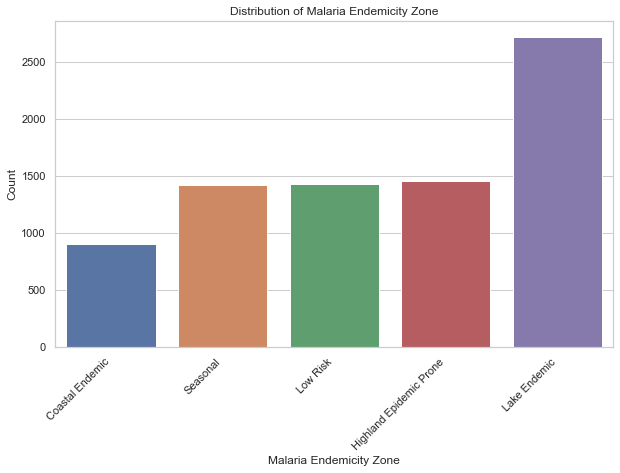

In [47]:
# Countplot of Malaria Endemicity Zone

# Mapping the variable labels to the column
malaria_endemicity_zone = df_2_cleaned['malaria_endemicity_zone'].map(variable_label__malaria_zone).reset_index()

# Setting the style
sns.set(style="whitegrid")

# Figure size
plt.figure(figsize=(10, 6))

# Creating the count plot
sns.countplot(x='malaria_endemicity_zone', data=malaria_endemicity_zone)

# Rotating x-axis labels at a 45-degree angle
plt.xticks(rotation=45, ha='right')

# Setting labels and title
plt.xlabel('Malaria Endemicity Zone')
plt.ylabel('Count')
plt.title('Distribution of Malaria Endemicity Zone')

# Displaying the plot
plt.show()

In [48]:
# Household Water source
# Mapping the variable labels to the column
variable_label_water_source = get_variable_label('main_source_drink_water', df_excel_2, variable_label_2)
variable_label_water_source

{10.0: 'PIPED WATER',
 11.0: 'Piped into dwelling',
 12.0: 'Piped to yard/plot',
 13.0: 'Piped to neighbor',
 14.0: 'Public tap/standpipe',
 20.0: 'TUBE WELL WATER',
 21.0: 'Tube well or borehole',
 30.0: 'DUG WELL (OPEN/PROTECTED)',
 31.0: 'Protected well',
 32.0: 'Unprotected well',
 40.0: 'SURFACE FROM SPRING',
 41.0: 'Protected spring',
 42.0: 'Unprotected spring',
 43.0: 'River/dam/lake/ponds/stream/canal/irrigation channel',
 51.0: 'Rainwater',
 61.0: 'Tanker truck',
 62.0: 'Cart with small tank',
 71.0: 'Bottled water',
 96.0: 'Other'}

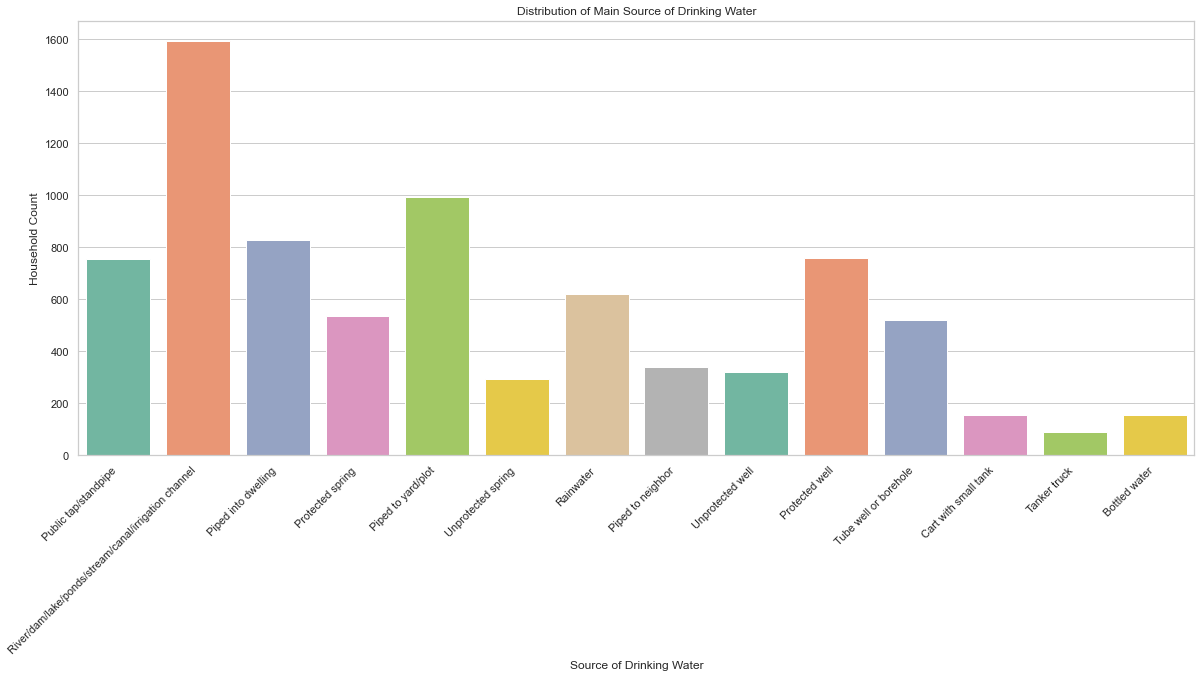

In [49]:
# Household source of drinking water

# # Mapping the variable labels to the column
household_water_source = df_2_cleaned['main_source_drink_water'].map(variable_label_water_source).reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the count plot
plt.figure(figsize=(20, 8))
sns.countplot(x='main_source_drink_water', data=household_water_source, palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Main Source of Drinking Water')
plt.xlabel('Source of Drinking Water')
plt.ylabel('Household Count')
plt.show()

In [50]:
# Household Malaria Measurement Result
# Mapping the variable labels to the column
variable_label_malaria_test_result = get_variable_label('malaria_measurement_result', df_excel_2, variable_label_2)
variable_label_malaria_test_result

{0.0: 'Measured', 3.0: 'Not present', 4.0: 'Refused', 6.0: 'Other'}

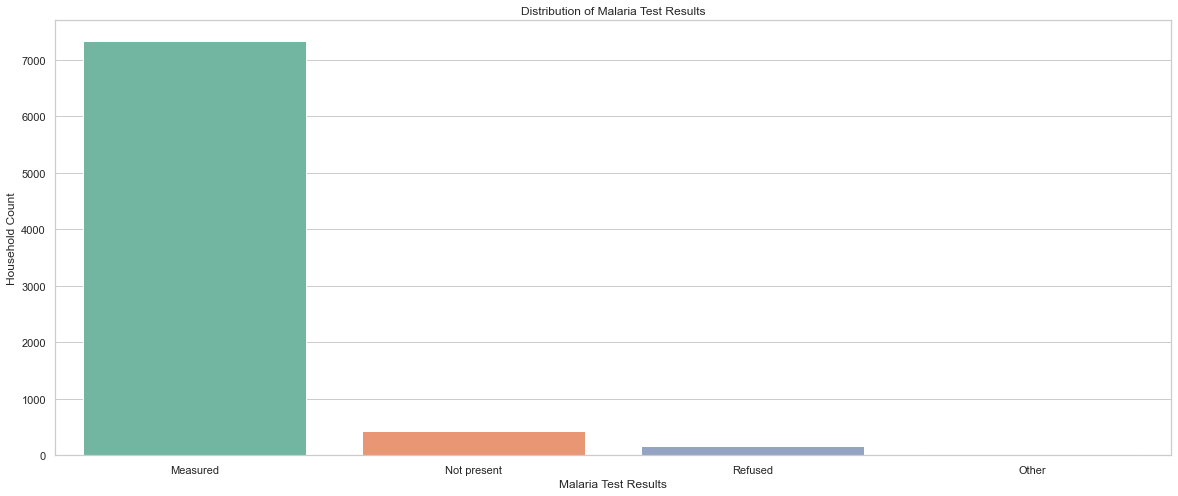

In [51]:
# Mapping the variable labels to the column
household_malaria_test_result = df_2_cleaned['malaria_measurement_result'].map(variable_label_malaria_test_result).reset_index()

# Setting the style of seaborn
sns.set(style="whitegrid")

# Plotting the count plot
plt.figure(figsize=(20, 8))
sns.countplot(x='malaria_measurement_result', data=household_malaria_test_result, palette="Set2")
plt.title('Distribution of Malaria Test Results')
plt.xlabel('Malaria Test Results')
plt.ylabel('Household Count')
plt.show()

In [52]:
# Household Region
# Mapping the variable labels to the column
variable_label_household_region = get_variable_label('region_of_residence ', df_excel_2, variable_label_2)
variable_label_household_region

{1.0: 'Coast',
 2.0: 'North Eastern',
 3.0: 'Eastern',
 4.0: 'Central',
 5.0: 'Rift Valley',
 7.0: 'Western',
 8.0: 'Nyanza',
 9.0: 'Nairobi'}

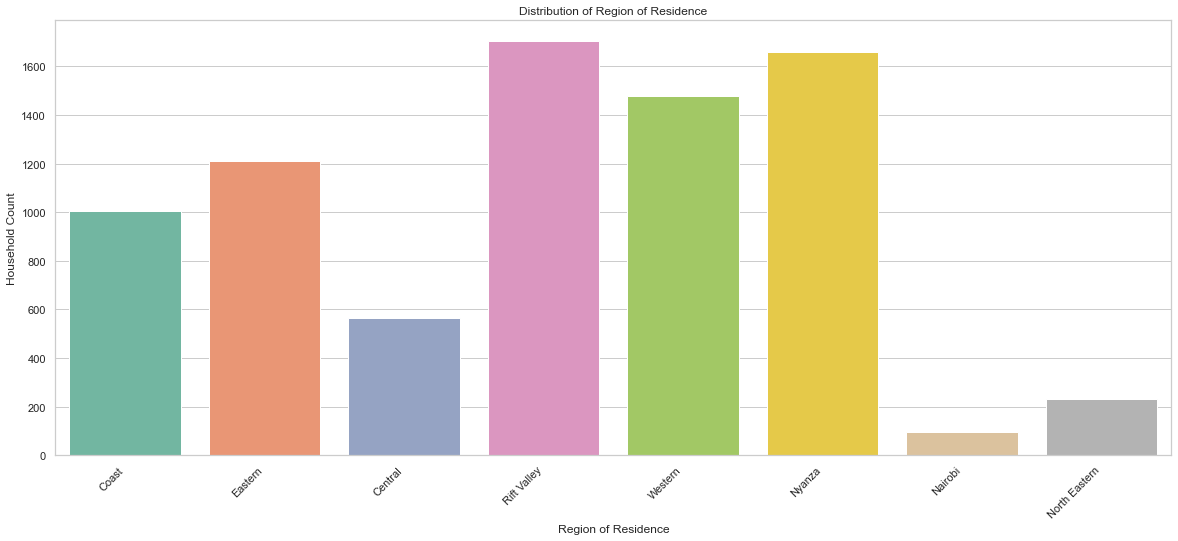

In [53]:
# Household region

# # Mapping the variable labels to the column
household_region = df_2_cleaned['region_of_residence '].map(variable_label_household_region).reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the count plot
plt.figure(figsize=(20, 8))
sns.countplot(x='region_of_residence ', data=household_region, palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Region of Residence')
plt.xlabel('Region of Residence')
plt.ylabel('Household Count')
plt.show()

## 2.4) Building Model

In [54]:
# Train test split

# Excluding non-numeric columns
numeric_columns = df_2_cleaned.select_dtypes(include='number').columns

# Assigning X and y splits
X = df_2_cleaned[numeric_columns].drop('final_blood_smear_test', axis=1)
y = df_2_cleaned['final_blood_smear_test']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [55]:
# Creating a logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Training the model
logistic_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Confusion Matrix:
 [[1471    0]
 [   0  120]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1471
         1.0       1.00      1.00      1.00       120

    accuracy                           1.00      1591
   macro avg       1.00      1.00      1.00      1591
weighted avg       1.00      1.00      1.00      1591



* Model Interpretability and Explainability:

Enhance model interpretability to provide actionable insights for decision-makers by employing techniques such as SHAP values or feature importance analysis.


## 2.5) Conclusion

## 2.6) Recommendation

## 2.7) Model Deployment